# Data Visualization III
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g.,
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as:
1. List down the features and their types (e.g., numeric, nominal) available in the dataset.
2. Create a histogram for each feature in the dataset to illustrate the feature distributions.
3. Create a box plot for each feature in the dataset.
4. Compare distributions and identify outliers.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [10]:
df.shape

(150, 5)

In [11]:
df.groupby('species').agg({
    'sepal_length':['mean','median','max','min','std'],
    'sepal_width':['mean','median','max','min','std'],
    'petal_length':['mean','median','max','min','std'],
    'petal_width':['mean','median','max','min','std'],
})

sepal_length                            sepal_width              \
                   mean median  max  min       std        mean median  max   
species                                                                      
setosa            5.006    5.0  5.8  4.3  0.352490       3.428    3.4  4.4   
versicolor        5.936    5.9  7.0  4.9  0.516171       2.770    2.8  3.4   
virginica         6.588    6.5  7.9  4.9  0.635880       2.974    3.0  3.8   

                          petal_length                            petal_width  \
            min       std         mean median  max  min       std        mean   
species                                                                         
setosa      2.3  0.379064        1.462   1.50  1.9  1.0  0.173664       0.246   
versicolor  2.0  0.313798        4.260   4.35  5.1  3.0  0.469911       1.326   
virginica   2.2  0.322497        5.552   5.55  6.9  4.5  0.551895       2.026   

                                       
           median  max  min       std  
species                                
setosa        0.2  0.6  0.1  0.105386  
versicolor    1.3  1.8  1.0  0.197753  
virginica     2.0  2.5  1.4  0.274650

In [14]:
numeric_col=df.select_dtypes(include=np.number).columns.tolist()
# df.select_dtypes(include=np.number)
print("numeric columns are ",numeric_col)

numeric columns are  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

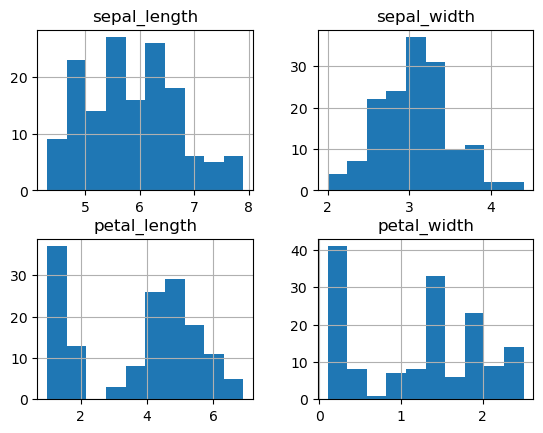

In [15]:
df.hist()

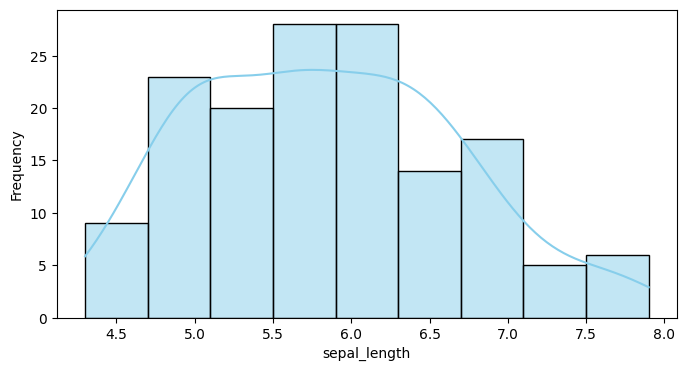

The Skewness of sepal_length is 0.3149109566369728
Positively skewed


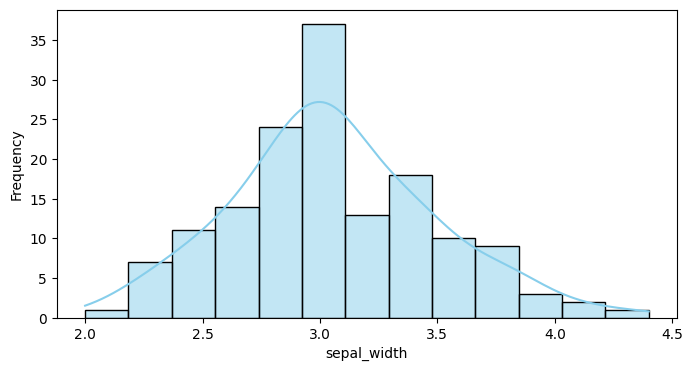

The Skewness of sepal_width is 0.31896566471359966
Positively skewed


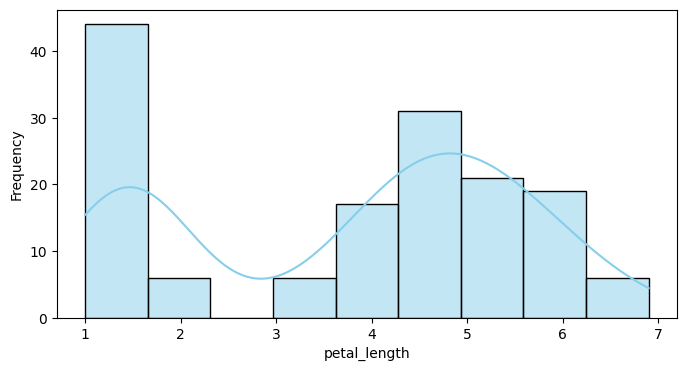

The Skewness of petal_length is -0.27488417975101276
Negatively skewed


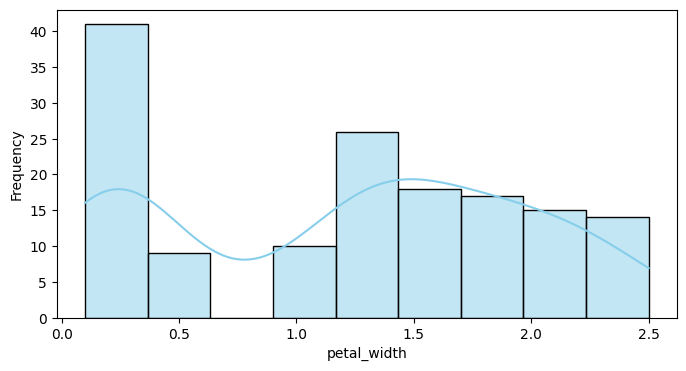

The Skewness of petal_width is -0.10296674764898116
Negatively skewed


In [15]:
for column in numeric_col:
    plt.figure(figsize=(8,4))
    sns.histplot(df[column],kde=True,color='skyblue')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    skew=df[column].skew()
    print(f"The Skewness of {column} is {skew}")
    if(skew>0):
        print("Positively skewed")
    elif(skew < 0):
        print("Negatively skewed")
    else: 
        print("Normal distribution")

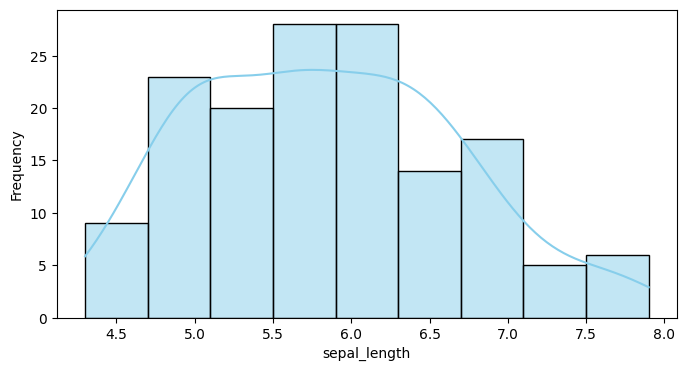

The old Skewness of sepal_length was 0.3149109566369728
The new Skewness of sepal_length was 0.3149109566369728
Positively skewed


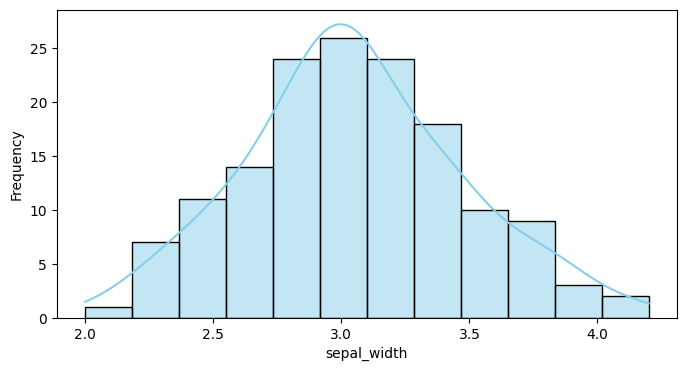

The old Skewness of sepal_width was 0.31896566471359966
The new Skewness of sepal_width was 0.19702808152358373
Positively skewed


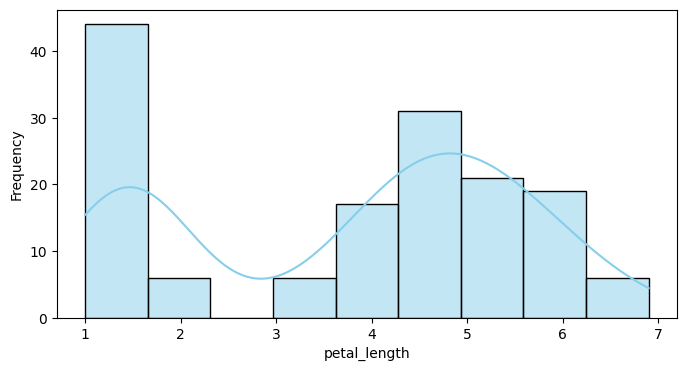

The old Skewness of petal_length was -0.27488417975101276
The new Skewness of petal_length was -0.27488417975101276
Negatively skewed


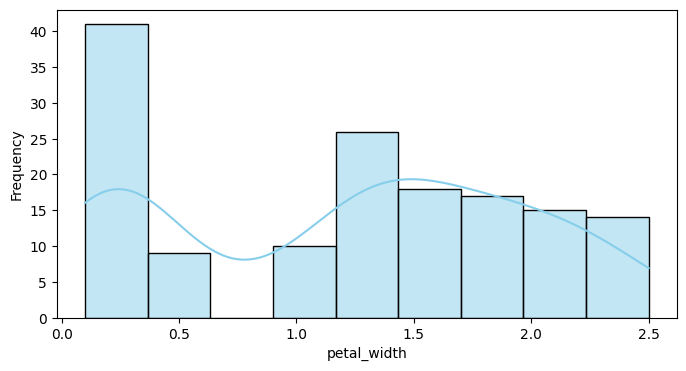

The old Skewness of petal_width was -0.10296674764898116
The new Skewness of petal_width was -0.10296674764898116
Negatively skewed


In [17]:
for column in numeric_col:
    z_score=stats.zscore(df[column])
    df_new=df[abs(z_score)<3]
    plt.figure(figsize=(8,4))
    sns.histplot(df_new[column],kde=True,color='skyblue')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    skew=df[column].skew()
    newskew=df_new[column].skew()
    print(f"The old Skewness of {column} was {skew}")
    print(f"The new Skewness of {column} was {newskew}")
    if(skew>0):
        print("Positively skewed")
    elif(skew < 0):
        print("Negatively skewed")
    else: 
        print("Normal distribution")

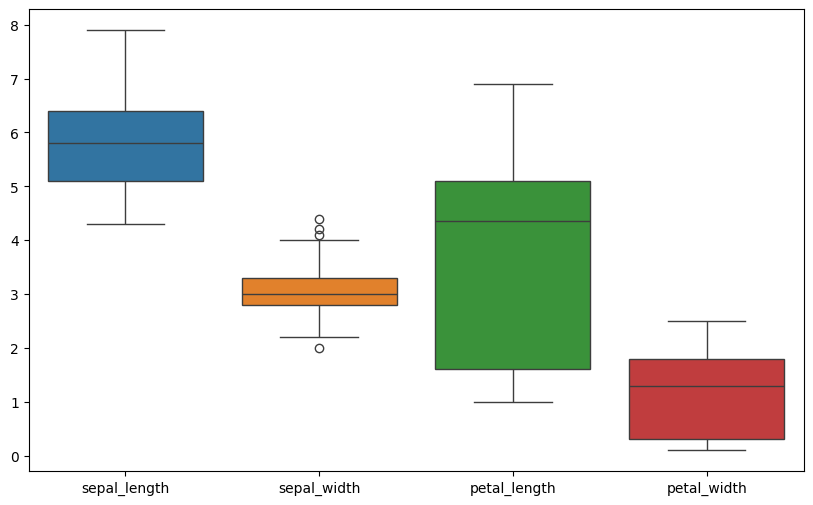

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.show()

<Axes: xlabel='petal_length', ylabel='species'>

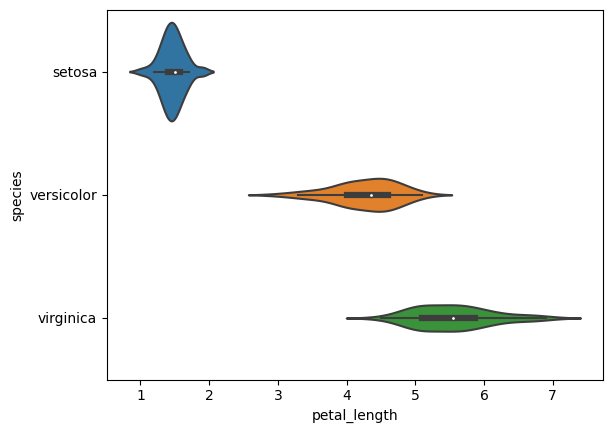

In [17]:
sns.violinplot(x='petal_length', data=df, y='species')
